<a href="https://colab.research.google.com/github/skilove13/Tensorflow-in-Practice-Specialization/blob/master/Week3_Exercies_03_sarcasm_word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import json
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_tok ="<OOV>"
training_size = 20000

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2020-05-17 05:11:20--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.13.128, 2607:f8b0:400c:c12::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.13.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2020-05-17 05:11:21 (186 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [0]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [32]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             #tf.keras.layers.Flatten(),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation='relu'),
                             tf.keras.layers.Dense(1, activation ='sigmoid')
])

model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [33]:
num_epochs = 10

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
625/625 - 2s - loss: 0.5632 - accuracy: 0.6984 - val_loss: 0.3956 - val_accuracy: 0.8356
Epoch 2/10
625/625 - 2s - loss: 0.3096 - accuracy: 0.8746 - val_loss: 0.3408 - val_accuracy: 0.8550
Epoch 3/10
625/625 - 2s - loss: 0.2324 - accuracy: 0.9082 - val_loss: 0.3427 - val_accuracy: 0.8550
Epoch 4/10
625/625 - 2s - loss: 0.1878 - accuracy: 0.9270 - val_loss: 0.3604 - val_accuracy: 0.8529
Epoch 5/10
625/625 - 2s - loss: 0.1563 - accuracy: 0.9426 - val_loss: 0.3878 - val_accuracy: 0.8502
Epoch 6/10
625/625 - 2s - loss: 0.1317 - accuracy: 0.9522 - val_loss: 0.4214 - val_accuracy: 0.8501
Epoch 7/10
625/625 - 2s - loss: 0.1125 - accuracy: 0.9617 - val_loss: 0.4576 - val_accuracy: 0.8451
Epoch 8/10
625/625 - 2s - loss: 0.0969 - accuracy: 0.9675 - val_loss: 0.4965 - val_accuracy: 0.8422
Epoch 9/10
625/625 - 2s - loss: 0.0836 - accuracy: 0.9719 - val_loss: 0.5415 - val_accuracy: 0.8351
Epoch 10/10
625/625 - 2s - loss: 0.0721 - accuracy: 0.9775 - val_loss: 0.5882 - val_accuracy: 0.8347

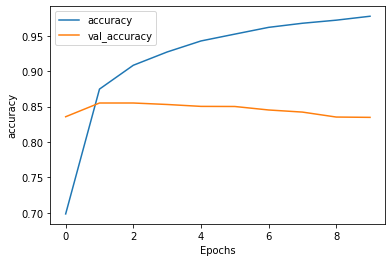

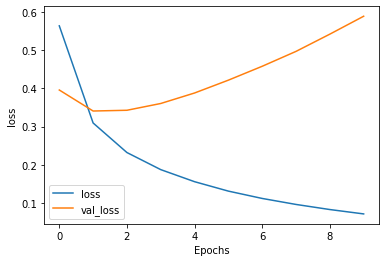

In [34]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [0]:
model.save("test.h5")